<p align="center"><img width="50%" src="https://aimodelsharecontent.s3.amazonaws.com/aimodshare_banner.jpg" /></p>


---

## Model Submission Guide: World Happiness Classification Competition
Let's share our models to a centralized leaderboard, so that we can collaborate and learn from the model experimentation process...

**Instructions:**
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model 
4. Generate predictions from X_test data and submit model to competition
5. Repeat submission process to improve place on leaderboard



## 1. Get data in and set up X_train, X_test, y_train objects

In [1]:
#install aimodelshare library
! pip install aimodelshare --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

In [3]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

Country or region  GDP per capita  Social support  Healthy life expectancy  \
0              Peru           0.960           1.274                    0.854   
1         Nicaragua           0.694           1.325                    0.835   
2            Greece           1.181           1.156                    0.999   
3             Qatar           1.684           1.313                    0.871   
4        Uzbekistan           0.745           1.529                    0.756   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.455       0.083                      0.027   
1                         0.435       0.200                      0.127   
2                         0.067       0.000                      0.034   
3                         0.555       0.220                      0.167   
4                         0.631       0.322                      0.240   

         name    region                       sub-region  Terrorist_attacks  
0        Peru  Americas  Latin America and the Caribbean          18.000000  
1   Nicaragua  Americas  Latin America and the Caribbean         125.611111  
2      Greece    Europe                  Southern Europe         112.000000  
3       Qatar      Asia                     Western Asia          57.333333  
4  Uzbekistan      Asia                     Central Asia         125.611111

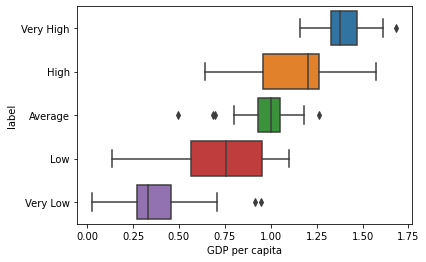

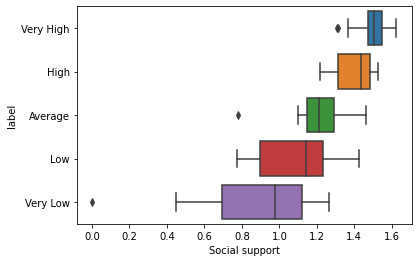

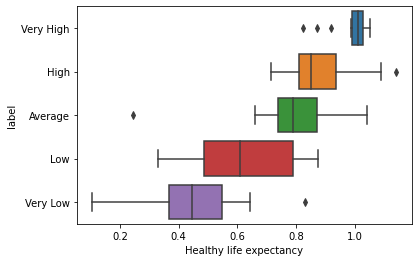

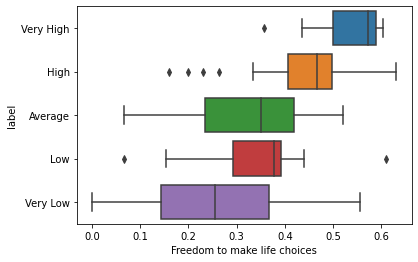

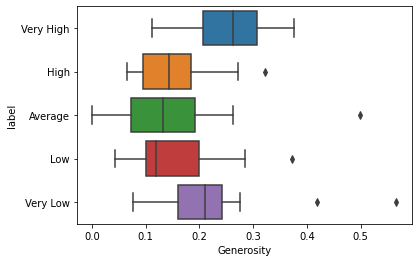

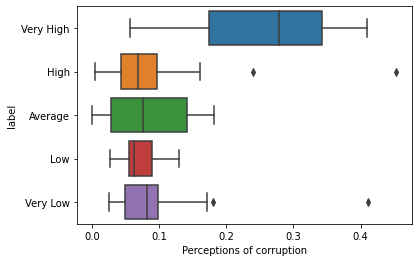

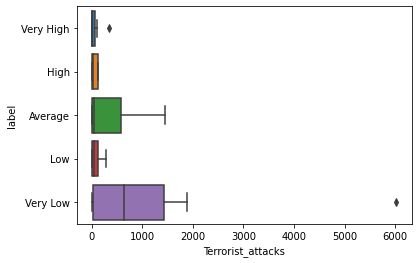

In [4]:
# Explore bivariate results (Use visualizations!)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = X_train.copy()
df['label'] = y_train_labels
features = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Terrorist_attacks']

#boxplot showing bivariate results
for f in features:
  sns.boxplot(data=df, x=f, y='label', order=['Very High', 'High', 'Average', 'Low', 'Very Low'])
  plt.show()

I used boxplots to show the bivariate relationship between particular features which are numerical and target variable which is categorical data. From these boxplots above, we can see approximately there is a positive relationship between GPD per capita and target variable levels of happiness, which makes sense. In general, it is more likely for people with more money to feel more happiness than the people who live in poverty. Also, there is a positve relationship between social support and happiness. Besides, from the plot there is a positve relationship between healthy life expectancy and levels of happiness in general. Moreover, we can see there is approximately negative relationship between the number of terrorist attacks and levels of happiness. We can notice that the average number of attacks with very low happiness level is higher than others.

##2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

def get_column_names_from_ColumnTransformer(column_transformer):    
    col_name = []
    for transformer_in_columns in column_transformer.transformers_[:-1]:#the last transformer is ColumnTransformer's 'remainder'
        raw_col_name = transformer_in_columns[2]
        if isinstance(transformer_in_columns[1],Pipeline): 
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
        try:
            names = transformer.get_feature_names()
        except AttributeError: # if no 'get_feature_names' function, use raw column name
            names = raw_col_name
        if isinstance(names,np.ndarray): # eg.
            col_name += names.tolist()
        elif isinstance(names,list):
            col_name += names    
        elif isinstance(names,str):
            col_name.append(names)
    return col_name

feature_name = get_column_names_from_ColumnTransformer(preprocess)

In [6]:
# Write function to transform data with preprocessor
def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [7]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(88, 26)

##3. Fit model on preprocessed data and save preprocessor function and model 


In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42) # as a basine line model for feature selection, obviously overfitted
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

1.0

GDP per capita                        0.184428
Healthy life expectancy               0.146082
Social support                        0.134153
Freedom to make life choices          0.107648
Terrorist_attacks                     0.092981
Generosity                            0.092899
Perceptions of corruption             0.088623
x1_Sub-Saharan Africa                 0.024985
x0_Europe                             0.017217
x0_Africa                             0.014020
x0_Americas                           0.011658
x0_Asia                               0.010804
x1_Latin America and the Caribbean    0.009788
x1_Southern Asia                      0.009583
x1_Southern Europe                    0.009074
x1_Western Europe                     0.007928
x1_Western Asia                       0.007543
x1_South-eastern Asia                 0.006365
x1_Central Asia                       0.005937
x1_Eastern Europe                     0.005478
x1_Northern Africa                    0.004936
x1_Eastern As

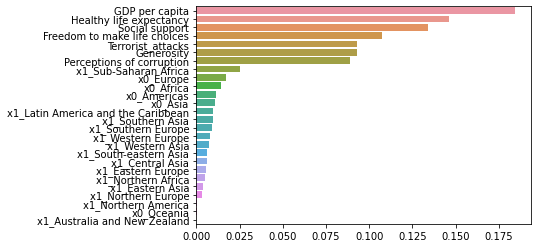

In [9]:
# automatic feature selection
# by Random Forest
feature_scores = pd.Series(model.feature_importances_, index=feature_name).sort_values(ascending=False)
print(feature_scores)
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.show()

I used random forest to see the feature importance, since this model has a built-in function for that. The higher score of a feature means this feature is more importance. We can see that the feature with the highest importance score is GDP per capita, which is accordance to the findings in Happiness, Benevolence, and Trust During COVID-19 and Beyond, and our bivariate visualization before. Obvisouly, GDP per capita is a very critical feature used for explaining or predicting the levels of happiness. Healthy life expectancy and social support are also useful to predict happiness categories, which are the same results to findings in that report and our visualizations. One-hot encoded location features(regions) are less important than others, which alongs with my common sense.

#### Save preprocessor function to local "preprocessor.zip" file

In [10]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


#### Save model to local ".onnx" file

In [11]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

## 4. Generate predictions from X_test data and submit model to competition


In [12]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [13]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

## 5. Repeat submission process to improve place on leaderboard


In [14]:
# My first model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'n_estimators': np.arange(100, 300, 500),'max_depth':[1, 3, 5, 7],
              'max_features': ['sqrt', 'log2', None]}

gridmodel = GridSearchCV(RandomForestClassifier(random_state=123), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
gridmodel.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))


best mean cross-validation score: 0.692
best parameters: {'max_depth': 7, 'max_features': 'log2', 'n_estimators': 100}


In [15]:
gridmodel.score(preprocessor(X_train), y_train_labels) # random forest after hyperparameter tuning

0.9886363636363636

In [16]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(gridmodel, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("gridmodel.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [17]:
#Submit Model 1: 

#-- Generate predicted values
prediction_labels = gridmodel.predict(preprocessor(X_test))

# Submit to Competition Leaderboard
mycompetition.submit_model(model_filepath = "gridmodel.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                           custom_metadata={"team":"4"})

Insert search tags to help users find your model (optional): model1
Provide any useful notes about your model (optional): rf

Your model has been submitted as model version 682

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [18]:
# Get leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

The first model of three models is the random forest after hyperparameter tuning. The model searched on the number of estimators, the max depth and the max number of features gridly. The best parameters found are {'max_depth': 7, 'max_features': 'log2', 'n_estimators': 100} with mean cross-validation score 0.692 and F1 score on training set 0.9886.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Second model:


param_grid = {'n_estimators': np.arange(100, 300, 500),'max_depth':[1, 3, 5, 7],
              'max_features': ['sqrt', 'log2', None]} 

gridmodel_2 = GridSearchCV(GradientBoostingClassifier(random_state=123, learning_rate=1.0), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
gridmodel_2.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel_2.best_score_))
print("best parameters: {}".format(gridmodel_2.best_params_))
print('F1 score on training set: ', gridmodel_2.score(preprocessor(X_train), y_train_labels))

# Save sklearn model to local ONNX file
onnx_model_2 = model_to_onnx(gridmodel_2, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model_2.onnx", "wb") as f:
    f.write(onnx_model_2.SerializeToString())

#-- Generate predicted values 
prediction_labels = gridmodel_2.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model_2.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                           custom_metadata={"team":"4"})


best mean cross-validation score: 0.703
best parameters: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}
F1 score on training set:  1.0
Insert search tags to help users find your model (optional): model2 / best one
Provide any useful notes about your model (optional): gbc

Your model has been submitted as model version 683

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [20]:
# Check leaderboard 

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

The second model is Gradient Boosting. After hyperparameter tuning with grid cross validation search, best mean cross-validation score is 0.703 with
best parameters {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}
F1 score on training set 1.0. This score is an indicate of overfitting. However, by checking the leaderboard, I noticed this model has a better performance on test data than my first model random forest.

In [21]:
# Third model:

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

gridmodel_3 = GridSearchCV(SVC(random_state=123), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
gridmodel_3.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel_3.best_score_))
print("best parameters: {}".format(gridmodel_3.best_params_))
print('F1 score on training set: ', gridmodel_3.score(preprocessor(X_train), y_train_labels))

# Save sklearn model to local ONNX file
onnx_model_3 = model_to_onnx(gridmodel_3, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model_3.onnx", "wb") as f:
    f.write(onnx_model_3.SerializeToString())

#-- Generate predicted values 
prediction_labels = gridmodel_3.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model_3.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                           custom_metadata={"team":"4"})

best mean cross-validation score: 0.681
best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
F1 score on training set:  0.8295454545454546
Insert search tags to help users find your model (optional): model3
Provide any useful notes about your model (optional): svc

Your model has been submitted as model version 685

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [22]:
# Check leaderboard 

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

The third model is SVC. After grid cv search on hyparameters, the best mean cross-validation score is 0.681 with parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} and F1 score on training set 0.8295. It has the poorest performance on test set among these three models.

After discussing with my team, I will try Keras.

In [23]:
# Fourth model after discussion with my team

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=preprocessor(X_train).shape[1] #count features in input data

keras_model = Sequential()
keras_model.add(Dense(128, input_dim=feature_count, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))

keras_model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20, 
               epochs = 300, validation_split=0.25) 


onnx_model_4 = model_to_onnx(keras_model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model_4.onnx", "wb") as f:
    f.write(onnx_model_4.SerializeToString())

# Submit keras model: 

#-- Generate predicted y values
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=keras_model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model_4.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                           custom_metadata={"team":"4"})

Epoch 1/300
4/4 [==============================] - 1s 112ms/step - loss: 1.6329 - accuracy: 0.1970 - val_loss: 1.6035 - val_accuracy: 0.3182
Epoch 2/300
4/4 [==============================] - 0s 14ms/step - loss: 1.6257 - accuracy: 0.2121 - val_loss: 1.6016 - val_accuracy: 0.3182
Epoch 3/300
4/4 [==============================] - 0s 18ms/step - loss: 1.6176 - accuracy: 0.2424 - val_loss: 1.5994 - val_accuracy: 0.2727
Epoch 4/300
4/4 [==============================] - 0s 21ms/step - loss: 1.6098 - accuracy: 0.2576 - val_loss: 1.5976 - val_accuracy: 0.2727
Epoch 5/300
4/4 [==============================] - 0s 18ms/step - loss: 1.6022 - accuracy: 0.2576 - val_loss: 1.5955 - val_accuracy: 0.2727
Epoch 6/300
4/4 [==============================] - 0s 31ms/step - loss: 1.5949 - accuracy: 0.2727 - val_loss: 1.5927 - val_accuracy: 0.2727
Epoch 7/300
4/4 [==============================] - 0s 16ms/step - loss: 1.5887 - accuracy: 0.2727 - val_loss: 1.5913 - val_accuracy: 0.2727
Epoch 8/300
4/4 [==

In [24]:
# Check leaderboard 

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

I tried random forest, gradient boosting, SVC and NN. Random forest has the best performance on test data among these models with hyper-parameter values of {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}.